Exploratory Data Analysis

Some of following codes were extracted from [[1]].

[1]: https://github.com/chirag1992m/Algorithmic-Trading-Challenge---Kaggle

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math


%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv("./input/training.csv")
test = pd.read_csv("./input/testing.csv")

transform the time columns into datetime

In [3]:
for col in train.columns:
    if str(col)[:4] == "time":
        train[col] = pd.to_datetime(train[col], format='%H%M%S', errors='ignore')

In [4]:
print(train.shape)
train.head()

(754018, 307)


,row_id,security_id,p_tcount,p_value,trade_vwap,trade_volume,initiator,transtype1,time1,bid1,ask1,transtype2,time2,bid2,ask2,transtype3,time3,bid3,ask3,transtype4,time4,bid4,ask4,transtype5,time5,bid5,ask5,transtype6,time6,bid6,ask6,transtype7,time7,bid7,ask7,transtype8,time8,bid8,ask8,transtype9,time9,bid9,ask9,transtype10,time10,bid10,ask10,transtype11,time11,bid11,ask11,transtype12,time12,bid12,ask12,transtype13,time13,bid13,ask13,transtype14,time14,bid14,ask14,transtype15,time15,bid15,ask15,transtype16,time16,bid16,ask16,transtype17,time17,bid17,ask17,transtype18,time18,bid18,ask18,transtype19,time19,bid19,ask19,transtype20,time20,bid20,ask20,transtype21,time21,bid21,ask21,transtype22,time22,bid22,ask22,transtype23,time23,bid23,ask23,transtype24,time24,bid24,ask24,transtype25,time25,bid25,ask25,transtype26,time26,bid26,ask26,transtype27,time27,bid27,ask27,transtype28,time28,bid28,ask28,transtype29,time29,bid29,ask29,transtype30,time30,bid30,ask30,transtype31,time31,bid31,ask31,transtype32,time32,bid32,ask32,transtype33,time33,bid33,ask33,transtype34,time34,bid34,ask34,transtype35,time35,bid35,ask35,transtype36,time36,bid36,ask36,transtype37,time37,bid37,ask37,transtype38,time38,bid38,ask38,transtype39,time39,bid39,ask39,transtype40,time40,bid40,ask40,transtype41,time41,bid41,ask41,transtype42,time42,bid42,ask42,transtype43,time43,bid43,ask43,transtype44,time44,bid44,ask44,transtype45,time45,bid45,ask45,transtype46,time46,bid46,ask46,transtype47,time47,bid47,ask47,transtype48,time48,bid48,ask48,transtype49,time49,bid49,ask49,transtype50,time50,bid50,ask50,bid51,ask51,bid52,ask52,bid53,ask53,bid54,ask54,bid55,ask55,bid56,ask56,bid57,ask57,bid58,ask58,bid59,ask59,bid60,ask60,bid61,ask61,bid62,ask62,bid63,ask63,bid64,ask64,bid65,ask65,bid66,ask66,bid67,ask67,bid68,ask68,bid69,ask69,bid70,ask70,bid71,ask71,bid72,ask72,bid73,ask73,bid74,ask74,bid75,ask75,bid76,ask76,bid77,ask77,bid78,ask78,bid79,ask79,bid80,ask80,bid81,ask81,bid82,ask82,bid83,ask83,bid84,ask84,bid85,ask85,bid86,ask86,bid87,ask87,bid88,ask88,bid89,ask89,bid90,ask90,bid91,ask91,bid92,ask92,bid93,ask93,bid94,ask94,bid95,ask95,bid96,ask96,bid97,ask97,bid98,ask98,bid99,ask99,bid100,ask100
0,1,1,9154,6831386312,2395.0,887,B,Q,08:00:20.799,2225.0,2314.5,Q,08:00:20.799,2225.0,2314.5,Q,08:00:20.799,2225.0,2314.5,Q,08:00:20.799,2225.0,2314.5,Q,08:00:20.799,2225.0,2314.5,Q,08:00:20.799,2225.0,2373.5,Q,08:00:20.801,2393.0,2394.0,Q,08:00:20.801,2393.0,2394.0,T,08:00:20.804,2393.0,2394.0,Q,08:00:20.845,2393.0,2393.5,Q,08:00:20.845,2393.0,2394.0,T,08:00:20.845,2393.0,2394.0,Q,08:00:20.845,2393.0,2394.0,Q,08:00:20.868,2393.0,2395.0,Q,08:00:20.868,2393.0,2395.0,Q,08:00:20.974,2393.0,2394.0,T,08:00:20.974,2393.0,2394.0,Q,08:00:20.974,2393.0,2394.0,Q,08:00:20.974,2393.0,2394.0,Q,08:00:21.996,2393.0,2394.0,Q,08:00:22.071,2393.0,2394.0,Q,08:00:23.821,2393.0,2394.0,Q,08:00:24.370,2393.0,2394.0,T,08:00:25.573,2393.0,2394.0,Q,08:00:25.573,2393.0,2394.0,T,08:00:28.805,2393.0,2394.0,Q,08:00:28.805,2393.0,2394.0,T,08:00:29.200,2393.0,2394.0,Q,08:00:29.200,2393.0,2394.0,Q,08:00:29.591,2393.0,2394.0,Q,08:00:30.368,2393.0,2394.0,Q,08:00:30.536,2393.0,2394.0,Q,08:00:30.869,2393.0,2394.0,Q,08:00:30.921,2393.0,2394.0,T,08:00:31.073,2393.0,2394.0,Q,08:00:31.073,2393.0,2394.0,Q,08:00:31.372,2393.0,2394.0,Q,08:00:31.384,2393.0,2394.0,Q,08:00:31.403,2393.0,2394.0,Q,08:00:31.867,2393.0,2394.0,T,08:00:31.867,2393.0,2394.0,Q,08:00:31.867,2393.0,2394.0,Q,08:00:31.971,2393.0,2394.0,Q,08:00:34.571,2393.0,2395.0,Q,08:00:34.571,2393.0,2395.0,Q,08:00:34.571,2393.0,2395.0,T,08:00:34.571,2393.0,2395.0,Q,08:00:34.571,2393.0,2395.0,T,08:00:34.571,2393.0,2395.0,Q,08:00:34.571,2393.0,2398.0,2393.0,2398.0,2393.0,2396.5,2393.0,2396.5,2393.0,2396.5,2393.0,2396.5,2393.5,2396.5,2393.5,2396.5,2393.5,2396.5,2393.5,2396.5,2393.5,2396.5,2393.5,2396.5,2393.5,2398.0,2393.5,2398.0,2393.5,2398.0,2393.5,2398.0,2393.5,2398.0,2393.5,2398.0,2393.5,2398.0,2393.5,2398.0,2393.5,2399.0,2393.5,2398.5,2393.5,2398.5,2393.5,2398.0,2396.5

Let us check the number of different securities.

In [5]:
train.security_id.unique().shape[0]

102

The training dataset is huge. It consists of 754018 samples of trade and quote data observations before and after a liquidity shock for several different securities of the London Stock Exchange (LSE).

In [6]:
train.describe()

,row_id,security_id,p_tcount,p_value,trade_vwap,trade_volume,bid1,ask1,bid2,ask2,bid3,ask3,bid4,ask4,bid5,ask5,bid6,ask6,bid7,ask7,bid8,ask8,bid9,ask9,bid10,ask10,bid11,ask11,bid12,ask12,bid13,ask13,bid14,ask14,bid15,ask15,bid16,ask16,bid17,ask17,bid18,ask18,bid19,ask19,bid20,ask20,bid21,ask21,bid22,ask22,bid23,ask23,bid24,ask24,bid25,ask25,bid26,ask26,bid27,ask27,bid28,ask28,bid29,ask29,bid30,ask30,bid31,ask31,bid32,ask32,bid33,ask33,bid34,ask34,bid35,ask35,bid36,ask36,bid37,ask37,bid38,ask38,bid39,ask39,bid40,ask40,bid41,ask41,bid42,ask42,bid43,ask43,bid44,ask44,bid45,ask45,bid46,ask46,bid47,ask47,bid48,ask48,bid49,ask49,bid50,ask50,bid51,ask51,bid52,ask52,bid53,ask53,bid54,ask54,bid55,ask55,bid56,ask56,bid57,ask57,bid58,ask58,bid59,ask59,bid60,ask60,bid61,ask61,bid62,ask62,bid63,ask63,bid64,ask64,bid65,ask65,bid66,ask66,bid67,ask67,bid68,ask68,bid69,ask69,bid70,ask70,bid71,ask71,bid72,ask72,bid73,ask73,bid74,ask74,bid75,ask75,bid76,ask76,bid77,ask77,bid78,ask78,bid79,ask79,bid80,ask80,bid81,ask81,bid82,ask82,bid83,ask83,bid84,ask84,bid85,ask85,bid86,ask86,bid87,ask87,bid88,ask88,bid89,ask89,bid90,ask90,bid91,ask91,bid92,ask92,bid93,ask93,bid94,ask94,bid95,ask95,bid96,ask96,bid97,ask97,bid98,ask98,bid99,ask99,bid100,ask100
count,754018.000000,754018.000000,754018.000000,7.540180e+05,754018.000000,7.540180e+05,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.00000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.000000,754018.0

Let us check whether there is any missing value.

In [7]:
naNum = train.isnull().sum()
print(naNum)

row_id          0
security_id     0
p_tcount        0
p_value         0
trade_vwap      0
trade_volume    0
initiator       0
transtype1      0
time1           0
bid1            0
ask1            0
transtype2      0
time2           0
bid2            0
ask2            0
transtype3      0
time3           0
bid3            0
ask3            0
transtype4      0
time4           0
bid4            0
ask4            0
transtype5      0
time5           0
bid5            0
ask5            0
transtype6      0
time6           0
bid6            0
ask6            0
transtype7      0
time7           0
bid7            0
ask7            0
transtype8      0
time8           0
bid8            0
ask8            0
transtype9      0
time9           0
bid9            0
ask9            0
transtype10     0
time10          0
bid10           0
ask10           0
transtype11     0
time11          0
bid11           0
ask11           0
transtype12     0
time12          0
bid12           0
ask12           0
transtype1

In [8]:
print(test.shape)
test.head()

(50000, 207)


,row_id,security_id,p_tcount,p_value,trade_vwap,trade_volume,initiator,transtype1,time1,bid1,ask1,transtype2,time2,bid2,ask2,transtype3,time3,bid3,ask3,transtype4,time4,bid4,ask4,transtype5,time5,bid5,ask5,transtype6,time6,bid6,ask6,transtype7,time7,bid7,ask7,transtype8,time8,bid8,ask8,transtype9,time9,bid9,ask9,transtype10,time10,bid10,ask10,transtype11,time11,bid11,ask11,transtype12,time12,bid12,ask12,transtype13,time13,bid13,ask13,transtype14,time14,bid14,ask14,transtype15,time15,bid15,ask15,transtype16,time16,bid16,ask16,transtype17,time17,bid17,ask17,transtype18,time18,bid18,ask18,transtype19,time19,bid19,ask19,transtype20,time20,bid20,ask20,transtype21,time21,bid21,ask21,transtype22,time22,bid22,ask22,transtype23,time23,bid23,ask23,transtype24,time24,bid24,ask24,transtype25,time25,bid25,ask25,transtype26,time26,bid26,ask26,transtype27,time27,bid27,ask27,transtype28,time28,bid28,ask28,transtype29,time29,bid29,ask29,transtype30,time30,bid30,ask30,transtype31,time31,bid31,ask31,transtype32,time32,bid32,ask32,transtype33,time33,bid33,ask33,transtype34,time34,bid34,ask34,transtype35,time35,bid35,ask35,transtype36,time36,bid36,ask36,transtype37,time37,bid37,ask37,transtype38,time38,bid38,ask38,transtype39,time39,bid39,ask39,transtype40,time40,bid40,ask40,transtype41,time41,bid41,ask41,transtype42,time42,bid42,ask42,transtype43,time43,bid43,ask43,transtype44,time44,bid44,ask44,transtype45,time45,bid45,ask45,transtype46,time46,bid46,ask46,transtype47,time47,bid47,ask47,transtype48,time48,bid48,ask48,transtype49,time49,bid49,ask49,transtype50,time50,bid50,ask50
0,754019,13,7308,6963537884,2619.500,62,S,Q,09:51:36.175,2617.5,2620.000,Q,09:51:36.194,2617.500,2620.000,Q,09:51:36.479,2617.500,2620.000,Q,09:51:36.583,2617.500,2620.000,Q,09:51:37.067,2617.500,2620.000,Q,09:51:37.067,2617.5,2620.000,Q,09:51:37.150,2617.000,2620.000,Q,09:51:37.150,2617.000,2620.000,Q,09:51:37.150,2617.000,2620.000,Q,09:51:37.150,2617.000,2620.000,Q,09:51:37.150,2617.000,2620.000,Q,09:51:37.150,2617.000,2619.500,Q,09:51:37.160,2617.000,2619.500,Q,09:51:37.160,2617.000,2619.50,Q,09:51:37.160,2617.000,2619.50,Q,09:51:37.160,2617.000,2619.500,Q,09:51:37.250,2617.000,2619.50,Q,09:51:37.250,2617.500,2619.500,Q,09:51:37.250,2617.500,2619.50,Q,09:51:37.250,2617.500,2619.00,Q,09:51:37.250,2617.500,2619.50,Q,09:51:37.718,2617.500,2619.50,Q,09:51:37.773,2617.500,2619.50,Q,09:51:39.179,2617.500,2620.000,Q,09:51:39.179,2617.500,2620.00,Q,09:51:39.179,2617.500,2620.00,Q,09:51:39.179,2617.500,2620.00,Q,09:51:39.179,2617.500,2620.000,Q,09:51:39.275,2617.500,2619.50,Q,09:51:39.275,2617.500,2619.500,Q,09:51:40.165,2617.500,2619.50,Q,09:51:41.175,2617.500,2619.50,Q,09:51:41.273,2617.500,2619.50,Q,09:51:42.234,2617.500,2619.50,Q,09:51:51.060,2617.500,2619.50,Q,09:51:51.060,2618.000,2619.500,Q,09:51:51.060,2617.500,2619.50,Q,09:51:51.060,2617.500,2619.500,Q,09:51:51.087,2617.500,2619.500,Q,09:51:56.513,2617.500,2619.500,T,09:51:57.310,2617.500,2619.50,Q,09:51:57.310,2617.500,2619.50,T,09:51:57.310,2617.500,2619.50,Q,09:51:57.310,2617.500,2620.00,Q,09:51:57.310,2619.500,2620.00,T,09:51:57.310,2619.500,2620.00,Q,09:51:57.310,2619.500,2620.00,Q,09:51:57.310,2619.500,2620.00,T,09:51:57.311,2619.500,2620.00,Q,09:51:57.311,2617.50,2620.00
1,754020,60,1854,877211069,288.200,104,B,Q,11:05:17.952,288.1,288.200,Q,11:05:18.439,288.100,288.200,Q,11:05:18.439,288.100,288.200,T,11:05:23.932,288.100,288.200,Q,11:05:23.949,288.100,288.300,Q,11:05:24.572,288.1,288.300,Q,11:05:26.235,288.100,288.200,T,11:05:26.333,288.100,288.200,Q,11:05:26.342,288.100,288.300,Q,11:05:26.450,288.100,288.300,Q,11:05:40.132,288.100,288.300,Q,11:05:50.135,288.100,288.300,Q,11:05:51.212,288.100,288.300,Q,11:05:56.344,288.100,288.30,Q,11:06:14.367,288.100,288.30,Q,11:06:14.367,288.100,288.300,Q,11:06:16.166,288.100,288.30,Q,11:06:23.119,288.100,288.300,Q,11:06:23.333,288.100,288.30,Q,11:06:25.228,288.100,288.30,Q,11:06:26.042,288.100,288.30,T,11:06:26.136,288.100,288.30,Q,11:06:26.136,288.100,288.30,Q,11:06:26.650

The test dataset consists of 50000 samples similar to the training dataset but without the post-liquidity shock observations.

In [9]:
test.describe()

,row_id,security_id,p_tcount,p_value,trade_vwap,trade_volume,bid1,ask1,bid2,ask2,bid3,ask3,bid4,ask4,bid5,ask5,bid6,ask6,bid7,ask7,bid8,ask8,bid9,ask9,bid10,ask10,bid11,ask11,bid12,ask12,bid13,ask13,bid14,ask14,bid15,ask15,bid16,ask16,bid17,ask17,bid18,ask18,bid19,ask19,bid20,ask20,bid21,ask21,bid22,ask22,bid23,ask23,bid24,ask24,bid25,ask25,bid26,ask26,bid27,ask27,bid28,ask28,bid29,ask29,bid30,ask30,bid31,ask31,bid32,ask32,bid33,ask33,bid34,ask34,bid35,ask35,bid36,ask36,bid37,ask37,bid38,ask38,bid39,ask39,bid40,ask40,bid41,ask41,bid42,ask42,bid43,ask43,bid44,ask44,bid45,ask45,bid46,ask46,bid47,ask47,bid48,ask48,bid49,ask49,bid50,ask50
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,779018.500000,51.103360,4660.743740,3.100653e+09,1048.970811,1156.316160,1048.353703,1049.626834,1048.364048,1049.624621,1048.368885,1049.624728,1048.365934,1049.605292,1048.372839,1049.599809,1048.371865,1049.597600,1048.367590,1049.593238,1048.381521,1049.588462,1048.384442,1049.588848,1048.384992,1049.579176,1048.385034,1049.573552,1048.388868,1049.563608,1048.390127,1049.561870,1048.395007,1049.563135,1048.395886,1049.552654,1048.398034,1049.548396,1048.405882,1049.548287,1048.408606,1049.549252,1048.423535,1049.549747,1048.425809,1049.547930,1048.426829,1049.540962,1048.429350,1049.540769,1048.427517,1049.538621,1048.427410,1049.537217,1048.429210,1049.535497,1048.431068,1049.532752,1048.433569,1049.529896,1048.435168,1049.528948,1048.436420,1049.525603,1048.439312,1049.521283,1048.441357,1049.519569,1048.443114,1049.516043,1048.446348,1049.512473,1048.450217,1049.509967,1048.456283,1049.506502,1048.461659,1049.503501,1048.466460,1049.497773,1048.469517,1049.493126,1048.474443,1049.486792,1048.481267,1049.478329,1048.490141,1049.470883,1048.497744,1049.463492,1048.505318,1049.452269,1048.516395,1049.439583,1048.531574,1049.426626,1048.548616,1049.409999,1048.567238,1049.390816,1048.609536,1049.345175,1048.609536,1049.345175,1048.308774,1049.635679
std,14433.901067,29.528781,4226.939664,3.926243e+09,973.673286,4528.854529,973.078860,974.155520,973.142357,974.176068,973.144777,974.174135,973.139437,974.156909,973.145249,974.155008,973.144173,974.154526,973.139984,974.153593,973.152493,974.150962,973.153602,974.151118,973.156465,974.145364,973.156175,974.144455,973.161566,974.138088,973.155814,974.134053,973.158051,974.135517,973.157214,974.124167,973.160896,974.121981,973.167739,974.125660,973.167560,974.129478,973.241959,974.134454,973.241536,974.129959,973.242106,974.126214,973.244852,974.130118,973.242459,974.124791,973.240199,974.121034,973.240838,974.117986,973.238149,974.118373,973.240642,974.114918,973.241836,974.117196,973.

Let us get the securities with the highest row counts.

In [10]:
securitiesToGet = 3
topSecurities = (np.array(train['security_id'].value_counts()
                          .sort_values(ascending=False)#order(ascending=False)
                          .head(securitiesToGet).axes)).reshape(securitiesToGet)
print "Top 3 Securities with highest row counts: ", topSecurities

Top 3 Securities with highest row counts:  [ 18  73 102]


The top 3 securities are security 18, 73 and 102

We focus on price changes of security 18.

In [11]:
train_set = train[train.security_id==18]

In [12]:
# train_set = pd.DataFrame.from_csv('./input/subset_train_OHE.csv')
# test_set = pd.DataFrame.from_csv('./input/subset_test_OHE.csv')

In [13]:
train_set.head()

,row_id,security_id,p_tcount,p_value,trade_vwap,trade_volume,initiator,transtype1,time1,bid1,ask1,transtype2,time2,bid2,ask2,transtype3,time3,bid3,ask3,transtype4,time4,bid4,ask4,transtype5,time5,bid5,ask5,transtype6,time6,bid6,ask6,transtype7,time7,bid7,ask7,transtype8,time8,bid8,ask8,transtype9,time9,bid9,ask9,transtype10,time10,bid10,ask10,transtype11,time11,bid11,ask11,transtype12,time12,bid12,ask12,transtype13,time13,bid13,ask13,transtype14,time14,bid14,ask14,transtype15,time15,bid15,ask15,transtype16,time16,bid16,ask16,transtype17,time17,bid17,ask17,transtype18,time18,bid18,ask18,transtype19,time19,bid19,ask19,transtype20,time20,bid20,ask20,transtype21,time21,bid21,ask21,transtype22,time22,bid22,ask22,transtype23,time23,bid23,ask23,transtype24,time24,bid24,ask24,transtype25,time25,bid25,ask25,transtype26,time26,bid26,ask26,transtype27,time27,bid27,ask27,transtype28,time28,bid28,ask28,transtype29,time29,bid29,ask29,transtype30,time30,bid30,ask30,transtype31,time31,bid31,ask31,transtype32,time32,bid32,ask32,transtype33,time33,bid33,ask33,transtype34,time34,bid34,ask34,transtype35,time35,bid35,ask35,transtype36,time36,bid36,ask36,transtype37,time37,bid37,ask37,transtype38,time38,bid38,ask38,transtype39,time39,bid39,ask39,transtype40,time40,bid40,ask40,transtype41,time41,bid41,ask41,transtype42,time42,bid42,ask42,transtype43,time43,bid43,ask43,transtype44,time44,bid44,ask44,transtype45,time45,bid45,ask45,transtype46,time46,bid46,ask46,transtype47,time47,bid47,ask47,transtype48,time48,bid48,ask48,transtype49,time49,bid49,ask49,transtype50,time50,bid50,ask50,bid51,ask51,bid52,ask52,bid53,ask53,bid54,ask54,bid55,ask55,bid56,ask56,bid57,ask57,bid58,ask58,bid59,ask59,bid60,ask60,bid61,ask61,bid62,ask62,bid63,ask63,bid64,ask64,bid65,ask65,bid66,ask66,bid67,ask67,bid68,ask68,bid69,ask69,bid70,ask70,bid71,ask71,bid72,ask72,bid73,ask73,bid74,ask74,bid75,ask75,bid76,ask76,bid77,ask77,bid78,ask78,bid79,ask79,bid80,ask80,bid81,ask81,bid82,ask82,bid83,ask83,bid84,ask84,bid85,ask85,bid86,ask86,bid87,ask87,bid88,ask88,bid89,ask89,bid90,ask90,bid91,ask91,bid92,ask92,bid93,ask93,bid94,ask94,bid95,ask95,bid96,ask96,bid97,ask97,bid98,ask98,bid99,ask99,bid100,ask100
22479,22480,18,12906,9584789266,431.90,1650,B,Q,08:00:16.805,416.4,417.00,Q,08:00:16.805,416.4,417.00,Q,08:00:16.805,416.4,417.45,Q,08:00:16.805,416.4,417.45,Q,08:00:16.805,416.4,418.00,Q,08:00:16.805,416.4,418.00,Q,08:00:16.805,416.4,418.00,Q,08:00:16.805,416.4,418.00,Q,08:00:16.805,416.4,418.40,Q,08:00:16.805,416.40,419.00,Q,08:00:16.805,416.40,419.00,Q,08:00:16.805,416.4,419.65,Q,08:00:16.805,416.4,419.75,Q,08:00:16.805,416.4,419.85,Q,08:00:16.805,416.40,419.90,Q,08:00:16.805,416.40,419.90,Q,08:00:16.820,430.5,430.9,Q,08:00:16.820,430.5,430.9,T,08:00:16.820,430.50,430.9,Q,08:00:16.978,430.50,430.9,T,08:00:18.177,430.5,430.9,Q,08:00:18.177,430.5,430.9,Q,08:00:18.177,430.5,430.85,Q,08:00:18.270,430.50,430.85,T,08:00:18.306,430.50,430.85,Q,08:00:18.306,430.5,430.85,T,08:00:18.306,430.50,430.85,Q,08:00:18.306,430.5,430.9,T,08:00:18.324,430.5,430.9,Q,08:00:18.324,430.5,431.0,T,08:00:18.324,430.5,431.00,Q,08:00:18.324,430.50,431.90,Q,08:00:18.367,431.0,431.90,Q,08:00:18.385,431.0,431.90,Q,08:00:18.385,431.05,431.90,T,08:00:18.474,431.05,431.90,Q,08:00:18.496,431.0,431.90,T,08:00:18.595,431.0,431.90,Q,08:00:18.595,431.0,431.90,T,08:00:18.665,431.0,431.90,Q,08:00:18.665,431.00,431.90,Q,08:00:19.072,431.0,431.90,T,08:00:19.130,431.0,431.90,Q,08:00:19.130,431.0,431.90,T,08:00:19.136,431.0,431.90,Q,08:00:19.136,431.0,431.90,T,08:00:19.136,431.0,431.90,Q,08:00:19.136,431.0,431.90,T,08:00:21.061,431.0,431.90,Q,08:00:21.061,431.0,432.90,431.0,432.90,431.0,432.90,431.55,432.9,431.0,432.9,431.0,432.9,431.0,432.90,431.0,432.85,431.0,432.85,431.0,432.85,431.00,432.85,431.00,432.85,431.00,432.90,431.00,432.9,431.00,432.90,431.00,432.90,431.00,432.90,431.00,433.90,431.00,433.90,431.00,432.90,431.00,432.90,431.00,433.90,431.00,433.90,431.00,433.90,431.00,433.90,431.00,433.90,431.00,433.95,431.00,433.

In [14]:
bid_column_names = []
ask_column_names = []
for column in train_set.columns.values:
    if column.startswith('bid'):
        bid_column_names.append(column)
    elif column.startswith('ask'):
        ask_column_names.append(column)
        
print(bid_column_names)
print(ask_column_names)

['bid1', 'bid2', 'bid3', 'bid4', 'bid5', 'bid6', 'bid7', 'bid8', 'bid9', 'bid10', 'bid11', 'bid12', 'bid13', 'bid14', 'bid15', 'bid16', 'bid17', 'bid18', 'bid19', 'bid20', 'bid21', 'bid22', 'bid23', 'bid24', 'bid25', 'bid26', 'bid27', 'bid28', 'bid29', 'bid30', 'bid31', 'bid32', 'bid33', 'bid34', 'bid35', 'bid36', 'bid37', 'bid38', 'bid39', 'bid40', 'bid41', 'bid42', 'bid43', 'bid44', 'bid45', 'bid46', 'bid47', 'bid48', 'bid49', 'bid50', 'bid51', 'bid52', 'bid53', 'bid54', 'bid55', 'bid56', 'bid57', 'bid58', 'bid59', 'bid60', 'bid61', 'bid62', 'bid63', 'bid64', 'bid65', 'bid66', 'bid67', 'bid68', 'bid69', 'bid70', 'bid71', 'bid72', 'bid73', 'bid74', 'bid75', 'bid76', 'bid77', 'bid78', 'bid79', 'bid80', 'bid81', 'bid82', 'bid83', 'bid84', 'bid85', 'bid86', 'bid87', 'bid88', 'bid89', 'bid90', 'bid91', 'bid92', 'bid93', 'bid94', 'bid95', 'bid96', 'bid97', 'bid98', 'bid99', 'bid100']
['ask1', 'ask2', 'ask3', 'ask4', 'ask5', 'ask6', 'ask7', 'ask8', 'ask9', 'ask10', 'ask11', 'ask12', 'ask13'

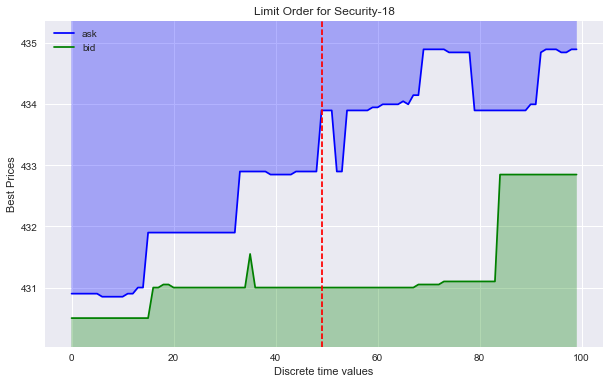

In [15]:
plot_margin = 0.25

#visualizing a day's bid-ask data for one security
time_period = range(0, 100)
bid_values = np.array(train_set[2:3][bid_column_names]).flatten('F')
ask_values = np.array(train_set[2:3][ask_column_names]).flatten('F')

plt.figure(figsize=(10, 6))

plt.plot(time_period, ask_values, label='ask', color='b')
plt.plot(time_period, bid_values, label='bid', color='g')

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))

plt.axvline(x=49, color='r', linestyle='--')

plt.fill_between(time_period, ask_values, ask_values*10, interpolate=True, color='b', alpha=0.3)
plt.fill_between(time_period, 0, bid_values, interpolate=True, color='g', alpha=0.3)

plt.xlabel('Discrete time values')
plt.ylabel('Best Prices')

plt.legend()
plt.title('Limit Order for Security-18')



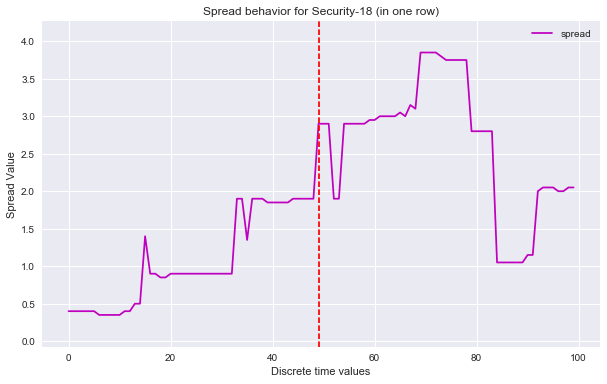

In [16]:
spread_values = ask_values - bid_values

plt.figure(figsize=(10, 6))

plt.plot(time_period, spread_values, label='spread', color='m')

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))

plt.axvline(x=49, color='r', linestyle='--')

plt.xlabel('Discrete time values')
plt.ylabel('Spread Value')

plt.legend()
plt.title('Spread behavior for Security-18 (in one row)')

In [17]:
# security18 = train_set[train_set['is_security_18'] == 1]
# security73 = train_set[train_set['is_security_73'] == 1]
# security102 = train_set[train_set['is_security_102'] == 1]


In [18]:
def change_bid_ask(train_set):
    changes_bid = np.zeros((train_set.shape[0], 50))
    changes_ask = np.zeros((train_set.shape[0], 50))
    index_row = 0
    for ix, row in train_set.iterrows():
        index_column = 0

        change = math.fabs(row[('bid' + str(50))] - row[('bid' + str(52))])
        changes_bid[index_row][index_column] = change
        change = math.fabs(row[('ask' + str(50))] - row[('ask' + str(52))])
        changes_ask[index_row][index_column] = change
        index_column = index_column+1
        for i in range(53, 101):
            change = math.fabs(row[('bid' + str(i-1))] - row[('bid' + str(i))])
            changes_bid[index_row][index_column] = change
            change = math.fabs(row[('ask' + str(i-1))] - row[('ask' + str(i))])
            changes_ask[index_row][index_column] = change
            index_column = index_column+1

        index_row = index_row+1

    changes_bid = np.mean(changes_bid, axis=0)
    changes_ask = np.mean(changes_ask, axis=0)
    
    return changes_bid, changes_ask

In [19]:
# from scipy.interpolate import interp1d #for smooth line plots

In [20]:
# changes_bid = interp1d(range(0, 50), changes_bid, kind='cubic')
# changes_ask = interp1d(range(0, 50), changes_ask, kind='cubic')

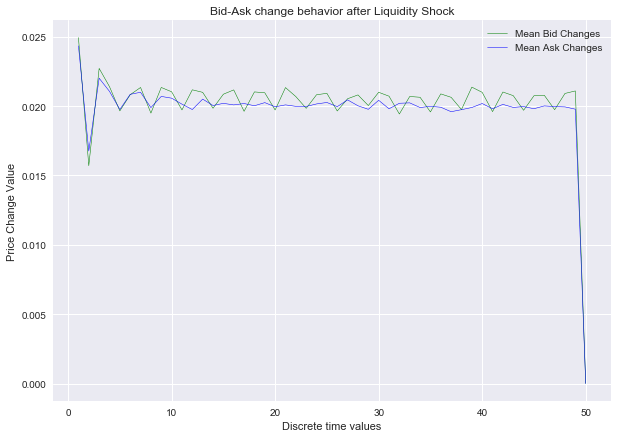

In [21]:
changes_bid, changes_ask = change_bid_ask(train_set)

plt.figure(figsize=(10, 6))

x_axis = range(1, 51)

plt.figure(figsize=(10,7))
plt.plot(x_axis, changes_bid, label='Mean Bid Changes', color='g', linewidth=0.5)
plt.plot(x_axis, changes_ask, label='Mean Ask Changes', color='b', linewidth=0.5)

plt.xlabel('Discrete time values')
plt.ylabel('Price Change Value')

plt.legend()
plt.title('Bid-Ask change behavior after Liquidity Shock')

In [22]:
# changes_bid, changes_ask = change_bid_ask(security18)

# x_axis = range(1, 51)

# plt.figure(figsize=(10,7))
# plt.plot(x_axis, changes_bid, label='Mean Bid Changes', color='g', linewidth=0.5)
# plt.plot(x_axis, changes_ask, label='Mean Ask Changes', color='b', linewidth=0.5)

# plt.xlabel('Discrete time values')
# plt.ylabel('Price Change Value')

# plt.legend()
# plt.title('Bid-Ask change behavior after Liquidity Shock, security18')
